<a href="https://colab.research.google.com/github/sanjeevm4788/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset =pd.read_excel('/content/drive/MyDrive/Bank Marketing Effectiveness prediction/Bankfull.xlsx')

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
dataset.shape

(45211, 17)

In [ ]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**NO NULL VALUES IN THE DATASET**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
dataset=dataset.drop_duplicates()
dataset.shape

(45211, 17)

**NO DUPLICATES IN THE DATASET**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


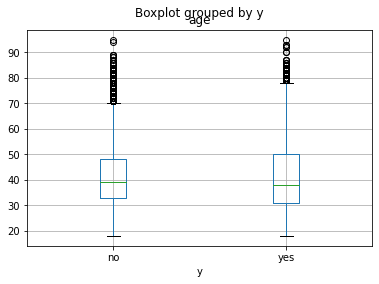

In [ ]:
dataset.boxplot(column='age',by='y')

**THE MEDIAN, MAXIMUM AND MINIMUM DIFFERS SLIGHTLY**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


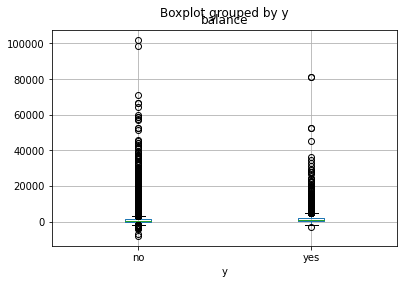

In [ ]:
dataset.boxplot(column='balance',by='y')

**BOTH CLASS HAVE SIMILAR DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


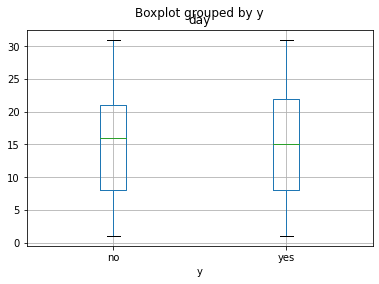

In [ ]:
dataset.boxplot(column='day',by='y')

**THE MEDIAN, MAXIMUM AND MINIMUM DIFFERS SLIGHTLY**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


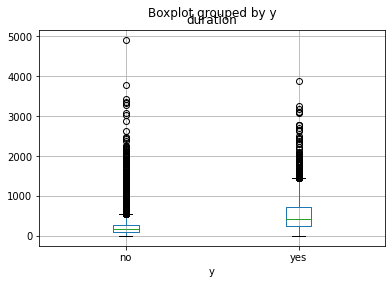

In [ ]:
dataset.boxplot(column='duration',by='y')

**HIGH DURATION HAVE A BIG EFFECT OF THE DEPENDENT VARIABLE**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


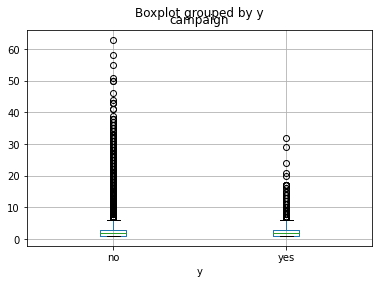

In [ ]:
dataset.boxplot(column='campaign',by='y')

**THE MEDIAN, MAXIMUM AND MINIMUM DIFFERS SLIGHTLY**

In [ ]:
dataset['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
dataset['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
dataset['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
dataset['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
dataset['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
dataset['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dataset['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
dataset['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dataset['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
dataset['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dataset['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
dataset['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
dataset['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
dataset['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
dataset['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
dataset['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
dataset['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
dataset['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dataset['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

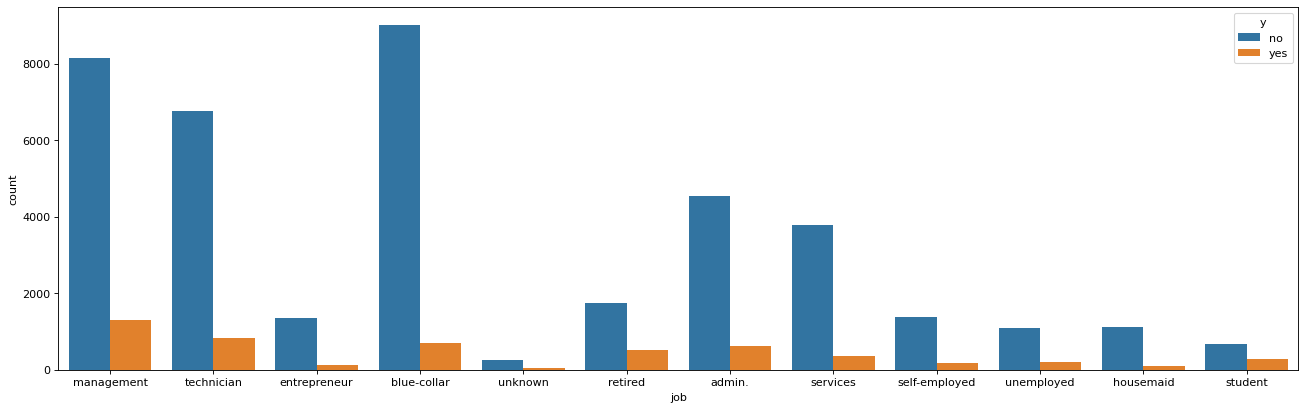

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
sns.countplot(data=dataset, x='job', hue='y')

**BLUE COLLAR HAVE HIGHER DISTRIBUTION IN NO CLASS**

**MANAGEMENT HAVE HIGHER DISTRIBUTION IN YES CLASS**

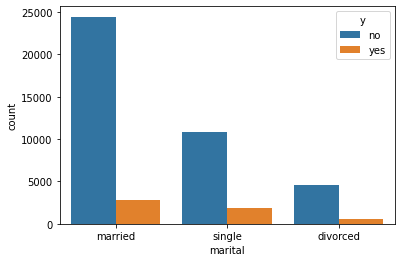

In [ ]:
sns.countplot(data=dataset, x='marital', hue='y')

**MARRIED HAVE HIGH DISTRIBUTION IN BOTH CLASS**

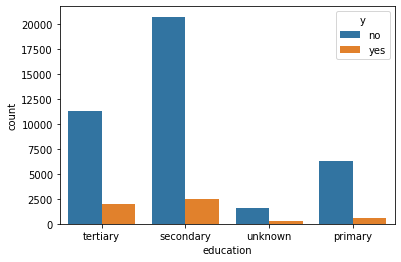

In [ ]:
sns.countplot(data=dataset, x='education', hue='y')

**SECONDARY HAVE HIGH DISTRIBUTION IN BOTH CLASS**

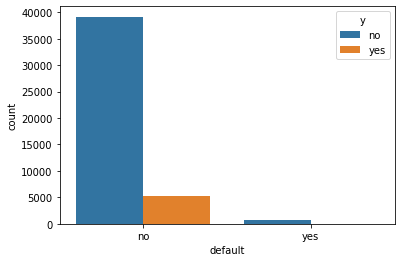

In [ ]:
sns.countplot(data=dataset, x='default', hue='y')

**NO(NOT HAVING CREDIT CARD) HAVE HIGH DISTRIBUTION IN BOTH CLASS**

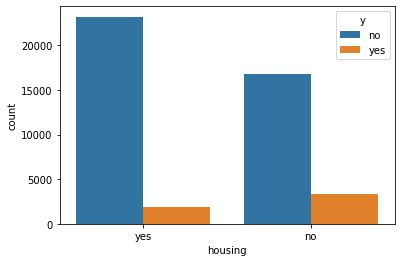

In [ ]:
sns.countplot(data=dataset, x='housing', hue='y')

**YES(TAKEN HOUSING LOAN) HAVE HIGHER DISTRIBUTION IN YES CLASS**

**NO(NOT TAKEN HOUSING LOAN) HAVE HIGHER DISTRIBUTION IN NO CLASS**

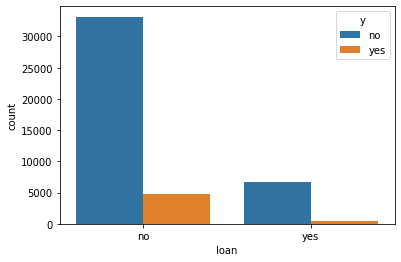

In [ ]:
sns.countplot(data=dataset, x='loan', hue='y')

**NO(NOT TAKEN LOAN) HAVE HIGHER DISTRIBUTION IN BOTH CLASS**

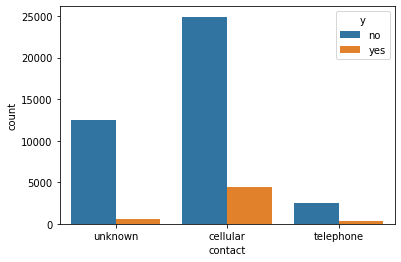

In [ ]:
sns.countplot(data=dataset, x='contact', hue='y')

**CELLULAR HAVE HIGHER DISTRIBUTION IN BOTH CLASS**

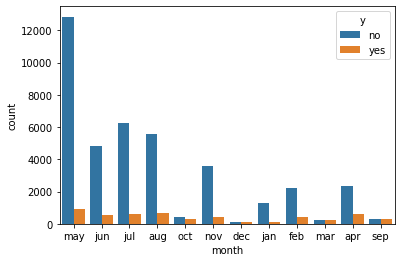

In [ ]:
sns.countplot(data=dataset, x='month', hue='y')

**MAY MONTH HAVE HIGHER DISTRIBUTION IN BOTH CLASS**

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dataset['default']= label_encoder.fit_transform(dataset['default'])
dataset['housing']= label_encoder.fit_transform(dataset['housing'])
dataset['loan']= label_encoder.fit_transform(dataset['loan'])
dataset['y']= label_encoder.fit_transform(dataset['y'])

In [ ]:
dataset['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [ ]:
dataset['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [ ]:
dataset['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [ ]:
dataset['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [ ]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


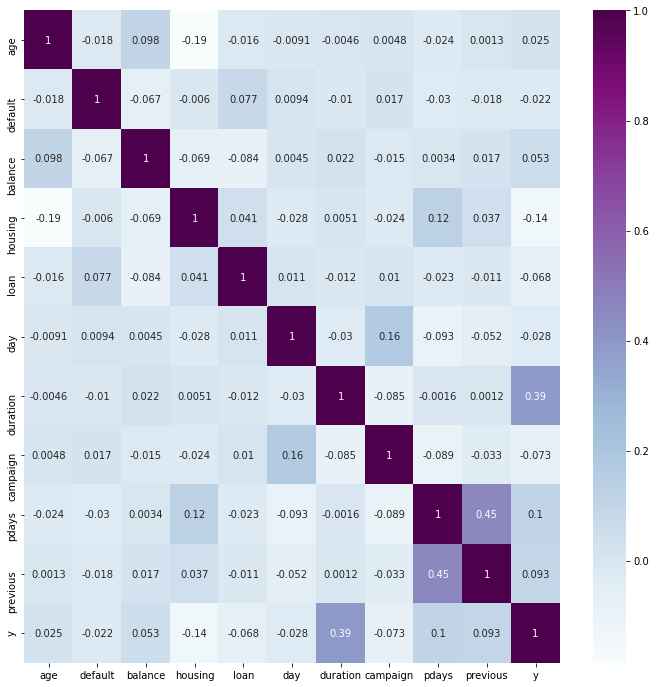

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), cmap='BuPu', annot=True)

**NO PARAMETER HAVE HIGH CORRELATION**

In [ ]:
onehotencoder_list=['job','marital','education','contact','month','poutcome'] 
for j in onehotencoder_list:
  onehotencoder = preprocessing.OneHotEncoder()
  X = onehotencoder.fit_transform(dataset[j].values.reshape(-1,1)).toarray()
  datasetOneHot = pd.DataFrame(X, columns = [str(j)+'_'+str(int(i)) for i in range(X.shape[1])]) 
  dataset = pd.concat([dataset, datasetOneHot], axis=1)
  dataset.drop([j],axis=1,inplace=True)

In [ ]:
dataset.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,contact_0,contact_1,contact_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,0,2143,1,0,5,261,1,-1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,0,29,1,0,5,151,1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,0,2,1,1,5,76,1,-1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,0,1506,1,0,5,92,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,0,1,0,0,5,198,1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          45211 non-null  int64  
 1   default      45211 non-null  int64  
 2   balance      45211 non-null  int64  
 3   housing      45211 non-null  int64  
 4   loan         45211 non-null  int64  
 5   day          45211 non-null  int64  
 6   duration     45211 non-null  int64  
 7   campaign     45211 non-null  int64  
 8   pdays        45211 non-null  int64  
 9   previous     45211 non-null  int64  
 10  y            45211 non-null  int64  
 11  job_0        45211 non-null  float64
 12  job_1        45211 non-null  float64
 13  job_2        45211 non-null  float64
 14  job_3        45211 non-null  float64
 15  job_4        45211 non-null  float64
 16  job_5        45211 non-null  float64
 17  job_6        45211 non-null  float64
 18  job_7        45211 non-null  float64
 19  job_

In [ ]:
X = dataset.drop(['y','duration'],axis=1)

In [ ]:
 Y = dataset['y']

In [ ]:
X

,age,default,balance,housing,loan,day,campaign,pdays,previous,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,contact_0,contact_1,contact_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,0,2143,1,0,5,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,0,29,1,0,5,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,0,2,1,1,5,1,-1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,0,1506,1,0,5,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,0,1,0,0,5,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,3,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,0,1729,0,0,17,2,-1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,0,5715,0,0,17,5,184,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,0,668,0,0,17,4,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=50,stratify=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [ ]:
Train_model_score = {}
Test_model_score = {}

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticmodel = LogisticRegression(class_weight='balanced')
logisticmodel.fit(X_train_Scaled, Y_train)
logistic_pred_train = logisticmodel.predict_proba(X_train_Scaled)
logistic_pred_test = logisticmodel.predict_proba(X_test_Scaled)
logistic_auc_score_train = roc_auc_score(Y_train, logistic_pred_train[:,1])
logistic_auc_score_test = roc_auc_score(Y_test, logistic_pred_test[:,1])
print("Logistic regression, AUC score for train",logistic_auc_score_train )
print("Logistic regression, AUC score for test",logistic_auc_score_test)

Logistic regression, AUC score for train 0.768733767815029
Logistic regression, AUC score for test 0.7689264961595051


In [ ]:
Train_model_score['Logistic regression'] = logistic_auc_score_train
Test_model_score['Logistic regression'] = logistic_auc_score_test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
knn_neighbors = [2,4,6,8,11,13]
for h,i in enumerate(knn_neighbors):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train_Scaled,Y_train)
    calibrated_knn = CalibratedClassifierCV(knn, method="sigmoid")
    calibrated_knn.fit(X_train_Scaled, Y_train)
    knn_pred_train = calibrated_knn.predict_proba(X_train_Scaled)
    knn_pred_test = calibrated_knn.predict_proba(X_test_Scaled)
    knn_auc_score_train = (roc_auc_score(Y_train,knn_pred_train[:,1]))
    knn_auc_score_test = (roc_auc_score(Y_test,knn_pred_test[:,1]))
    print ('AUC for number of neighbors = ',knn_neighbors[h],'for train',knn_auc_score_train,'and for test',knn_auc_score_test)

AUC for number of neighbors =  2 for train 0.9684973697071285 and for test 0.6918557716323019
AUC for number of neighbors =  4 for train 0.9289002870051561 and for test 0.7139146769758514
AUC for number of neighbors =  6 for train 0.9046152461571505 and for test 0.7243571062471814
AUC for number of neighbors =  8 for train 0.8881850359392335 and for test 0.7364385372857662
AUC for number of neighbors =  11 for train 0.8694003839262044 and for test 0.7437886845964728
AUC for number of neighbors =  13 for train 0.8604715031951015 and for test 0.7485693283602408


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=13,n_jobs=-1)
best_knn.fit(X_train_Scaled,Y_train)
best_calibrated_knn = CalibratedClassifierCV(best_knn)
best_calibrated_knn.fit(X_train_Scaled, Y_train)
best_knn_pred_train = best_calibrated_knn.predict_proba(X_train_Scaled)
best_knn_pred_test = best_calibrated_knn.predict_proba(X_test_Scaled)
best_knn_auc_score_train = (roc_auc_score(Y_train,best_knn_pred_train[:,1]))
best_knn_auc_score_test = (roc_auc_score(Y_test,best_knn_pred_test[:,1]))
print ('The best KNN AUC for train',best_knn_auc_score_train,'and for test',best_knn_auc_score_test)

The best KNN AUC for train 0.8604715031951015 and for test 0.7485693283602408


In [ ]:
Train_model_score['KNN Classification'] = best_knn_auc_score_train
Test_model_score['KNN Classification'] = best_knn_auc_score_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decisiontree_depth = [1,4,5,6,7,8,10,15,20]
for h,i in enumerate(decisiontree_depth):
    decisiontree =DecisionTreeClassifier(max_depth=i,random_state=50)
    decisiontree.fit(X_train_Scaled,Y_train)
    calibrated_decisiontree = CalibratedClassifierCV(decisiontree)
    calibrated_decisiontree.fit(X_train_Scaled, Y_train)
    decisiontree_pred_train = calibrated_decisiontree.predict_proba(X_train_Scaled)
    decisiontree_pred_test = calibrated_decisiontree.predict_proba(X_test_Scaled)
    decisiontree_auc_score_train = (roc_auc_score(Y_train,decisiontree_pred_train[:,1]))
    decisiontree_auc_score_test = (roc_auc_score(Y_test,decisiontree_pred_test[:,1]))
    print ('AUC for depth = ',decisiontree_depth[h],'for train',decisiontree_auc_score_train,'and for test',decisiontree_auc_score_test)

AUC for depth =  1 for train 0.5850049102890295 and for test 0.5888823917245591
AUC for depth =  4 for train 0.7166183250442828 and for test 0.7128900123459274
AUC for depth =  5 for train 0.7198818221115673 and for test 0.7131230816760632
AUC for depth =  6 for train 0.7246081080494039 and for test 0.7182420251582303
AUC for depth =  7 for train 0.7371087475477509 and for test 0.726261847296384
AUC for depth =  8 for train 0.7506977978766649 and for test 0.7345861746919142
AUC for depth =  10 for train 0.7848778772217492 and for test 0.7586996175484989
AUC for depth =  15 for train 0.8628755581470897 and for test 0.7697710617615969
AUC for depth =  20 for train 0.9343963835324075 and for test 0.7486424806436454


In [ ]:
best_decisiontree = DecisionTreeClassifier(max_depth=15,random_state=50)
best_decisiontree.fit(X_train_Scaled,Y_train)
best_calibrated_decisiontree = CalibratedClassifierCV(best_decisiontree)
best_calibrated_decisiontree.fit(X_train_Scaled, Y_train)
best_decisiontree_pred_train = best_calibrated_decisiontree.predict_proba(X_train_Scaled)
best_decisiontree_pred_test = best_calibrated_decisiontree.predict_proba(X_test_Scaled)
best_decisiontree_auc_score_train = (roc_auc_score(Y_train,best_decisiontree_pred_train[:,1]))
best_decisiontree_auc_score_test = (roc_auc_score(Y_test,best_decisiontree_pred_test[:,1]))
print ('The best decsiontree AUC for train',best_decisiontree_auc_score_train,'and for test',best_decisiontree_auc_score_test)

The best decsiontree AUC for train 0.8628755581470897 and for test 0.7697710617615969


In [ ]:
Train_model_score['DecisionTree Classification'] = best_decisiontree_auc_score_train
Test_model_score['DecisionTree Classification'] = best_decisiontree_auc_score_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_estimator=[2,3,4,5,6,7,8,9,10]
for h,i in enumerate(randomforest_estimator):
    randomforest = RandomForestClassifier(n_estimators=i,random_state=50,n_jobs=-1)
    randomforest.fit(X_train_Scaled,Y_train)
    calibrated_randomforest = CalibratedClassifierCV(randomforest)
    calibrated_randomforest.fit(X_train_Scaled, Y_train)
    randomforest_pred_train = calibrated_randomforest.predict_proba(X_train_Scaled)
    randomforest_pred_test = calibrated_randomforest.predict_proba(X_test_Scaled)
    randomforest_auc_score_train = (roc_auc_score(Y_train,randomforest_pred_train[:,1]))
    randomforest_auc_score_test = (roc_auc_score(Y_test,randomforest_pred_test[:,1]))
    print ('AUC for number of estimators = ',randomforest_estimator[h],'for train',randomforest_auc_score_train,'and for test',randomforest_auc_score_test)

AUC for number of estimators =  2 for train 0.9857768093081682 and for test 0.7371213511155723
AUC for number of estimators =  3 for train 0.9939085455902321 and for test 0.7545706564648034
AUC for number of estimators =  4 for train 0.9966760590993641 and for test 0.7641826060915256
AUC for number of estimators =  5 for train 0.9977821201953175 and for test 0.770781285325865
AUC for number of estimators =  6 for train 0.9985714903870031 and for test 0.7745391583699589
AUC for number of estimators =  7 for train 0.9989870708808831 and for test 0.7756101646163115
AUC for number of estimators =  8 for train 0.9992452013868268 and for test 0.7765053331328944
AUC for number of estimators =  9 for train 0.9993811713348115 and for test 0.7777021068567836
AUC for number of estimators =  10 for train 0.9995475611636644 and for test 0.7788311732892368


In [ ]:
best_randomforest = RandomForestClassifier(n_estimators=10,random_state=50,n_jobs=-1)
best_randomforest.fit(X_train_Scaled,Y_train)
best_calibrated_randomforest = CalibratedClassifierCV(best_randomforest)
best_calibrated_randomforest.fit(X_train_Scaled, Y_train)
best_randomforest_pred_train = best_calibrated_randomforest.predict_proba(X_train_Scaled)
best_randomforest_pred_test = best_calibrated_randomforest.predict_proba(X_test_Scaled)
best_randomforest_auc_score_train = (roc_auc_score(Y_train,best_randomforest_pred_train[:,1]))
best_randomforest_auc_score_test = (roc_auc_score(Y_test,best_randomforest_pred_test[:,1]))
print ('The best randomforest AUC for train',best_randomforest_auc_score_train,'and for test',best_randomforest_auc_score_test)

The best randomforest AUC for train 0.9995475611636644 and for test 0.7788311732892368


In [ ]:
Train_model_score['RandomForest Classification'] = best_randomforest_auc_score_train
Test_model_score['RandomForest Classification'] = best_randomforest_auc_score_test

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_estimator=[10,50,100,500,1000,2000]
for h,i in enumerate(xgb_estimator):
    xgb=XGBClassifier(n_estimators=i)
    xgb.fit(X_train_Scaled,Y_train)
    calibrated_xgb = CalibratedClassifierCV(xgb, method="sigmoid")
    calibrated_xgb.fit(X_train_Scaled, Y_train)
    xgb_pred_train = calibrated_xgb.predict_proba(X_train_Scaled)
    xgb_pred_test = calibrated_xgb.predict_proba(X_test_Scaled)
    xgb_auc_score_train = (roc_auc_score(Y_train,xgb_pred_train[:,1]))
    xgb_auc_score_test = (roc_auc_score(Y_test,xgb_pred_test[:,1]))
    print ('AUC for number of estimators = ',xgb_estimator[h],'for train',xgb_auc_score_train,'and for test',xgb_auc_score_test)

AUC for number of estimators =  10 for train 0.7503913752085496 and for test 0.7506710360754392
AUC for number of estimators =  50 for train 0.7910679326004376 and for test 0.7836678057747691
AUC for number of estimators =  100 for train 0.8075224868636327 and for test 0.7932140603896957
AUC for number of estimators =  500 for train 0.8473032174317248 and for test 0.7950718679755164
AUC for number of estimators =  1000 for train 0.8709841011663775 and for test 0.792498813346859
AUC for number of estimators =  2000 for train 0.8983232040668105 and for test 0.788066471514998


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'n_estimators' : [100,500,1000]}
best_xgb=XGBClassifier()
gridSearch_best_xgb=GridSearchCV(best_xgb,param,cv=5,n_jobs = -1)
best_calibrated_xgb=CalibratedClassifierCV(gridSearch_best_xgb)
best_calibrated_xgb.fit(X_test_Scaled,Y_test)
best_xgb_pred_train = best_calibrated_xgb.predict_proba(X_train_Scaled)
best_xgb_pred_test = best_calibrated_xgb.predict_proba(X_test_Scaled)
best_xgb_auc_score_train = (roc_auc_score(Y_train,best_xgb_pred_train[:,1]))
best_xgb_auc_score_test = (roc_auc_score(Y_test,best_xgb_pred_test[:,1]))
print ('The best xgb AUC for train',best_xgb_auc_score_train,'and for test',best_xgb_auc_score_test)

The best xgb AUC for train 0.7880316022192325 and for test 0.8331012306865543


In [ ]:
Train_model_score['XGB Classification'] = best_xgb_auc_score_train
Test_model_score['XGB Classification'] = best_xgb_auc_score_test

In [ ]:
Train_model_score

{'DecisionTree Classification': 0.8628755581470897,
 'KNN Classification': 0.8604715031951015,
 'Logistic regression': 0.768733767815029,
 'RandomForest Classification': 0.9995475611636644,
 'XGB Classification': 0.7880316022192325}

In [ ]:
Test_model_score

{'DecisionTree Classification': 0.7697710617615969,
 'KNN Classification': 0.7485693283602408,
 'Logistic regression': 0.7689264961595051,
 'RandomForest Classification': 0.7788311732892368,
 'XGB Classification': 0.8331012306865543}

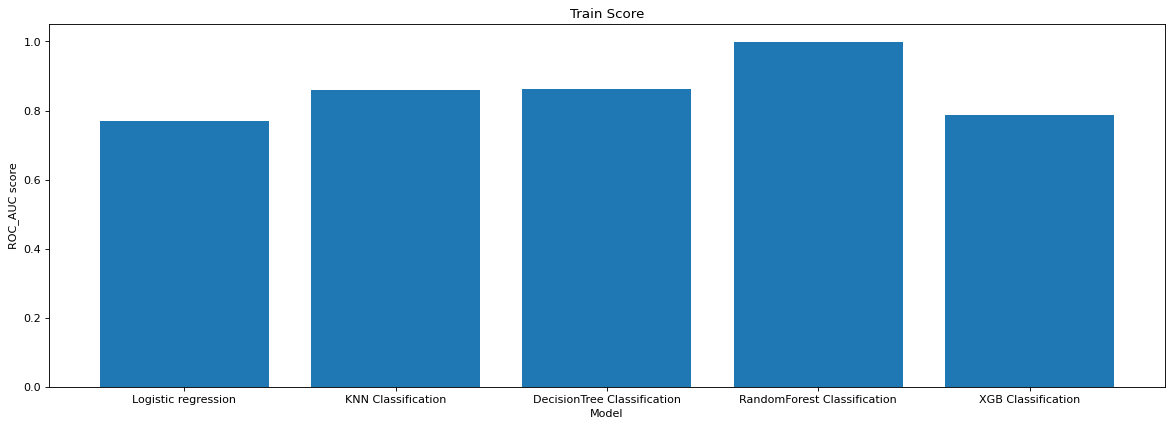

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
plt.bar(*zip(*Train_model_score.items()))
plt.title('Train Score')
plt.ylabel("ROC_AUC score")
plt.xlabel('Model')
plt.show()

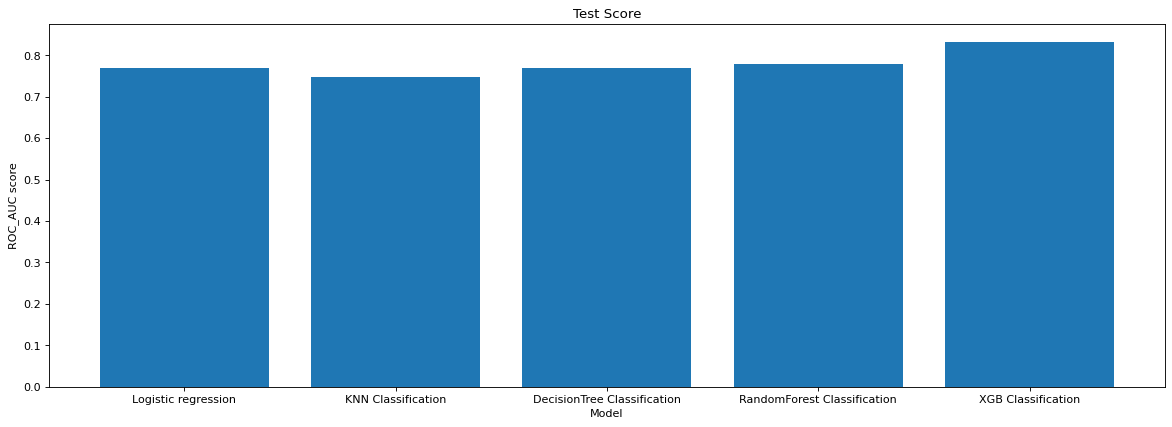

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
plt.bar(*zip(*Test_model_score.items()))
plt.title('Test Score')
plt.ylabel("ROC_AUC score")
plt.xlabel('Model')
plt.show()

**XGB HAVE HIGH AUC_ROC SCORE COMPARED TO OTHER MODELS**

**CONCLUSION**

**1.As XG boost model has the highest score of all, it can be as used for the prediction.**

**2.The model can help to classify the customers on the basis on which they deposit or not.**

**3.The model helps to target the right customer rather than wasting time on wrong customer.**


**SUMMARY**

**The project is based on a bank data to make prediction. The data is a cleaned dataset with no duplicate value. The aim of the project is to classify the customers if they will deposit or not. As marketing call is the important role in this prediction is should not be used in training the model, thus it is removed from the data. There are many categorical features in the dataset that needs to be converted. The categorical features are converted using label encoder and one hot encoder. The data are then standardized by standard scalar. Totally five different models are used, to select one with high accuracy. The five models that are used are linear regression, decision tree classification, random forest classification, k-nearest neighbors and XG boost. Different types of models needs to be trained to find the one model with high accuracy. The scoring metric used for these models are roc_auc score. The models are trained with calibration classifier to get the most of the models. Each score for the train set and the test set are noted. Each model is iterated with different parameter to find the most optimized parameter and those parameters are used to create the final model. Of the five models XG boost has the high roc_auc score thus it can be used to the prediction of classify the customers. This model can be used to target the right customers rather than wasting time on wrong customers thus saving lot of money and time for the company.**